In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Iris.csv')
print(data.describe())
print(data.columns)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


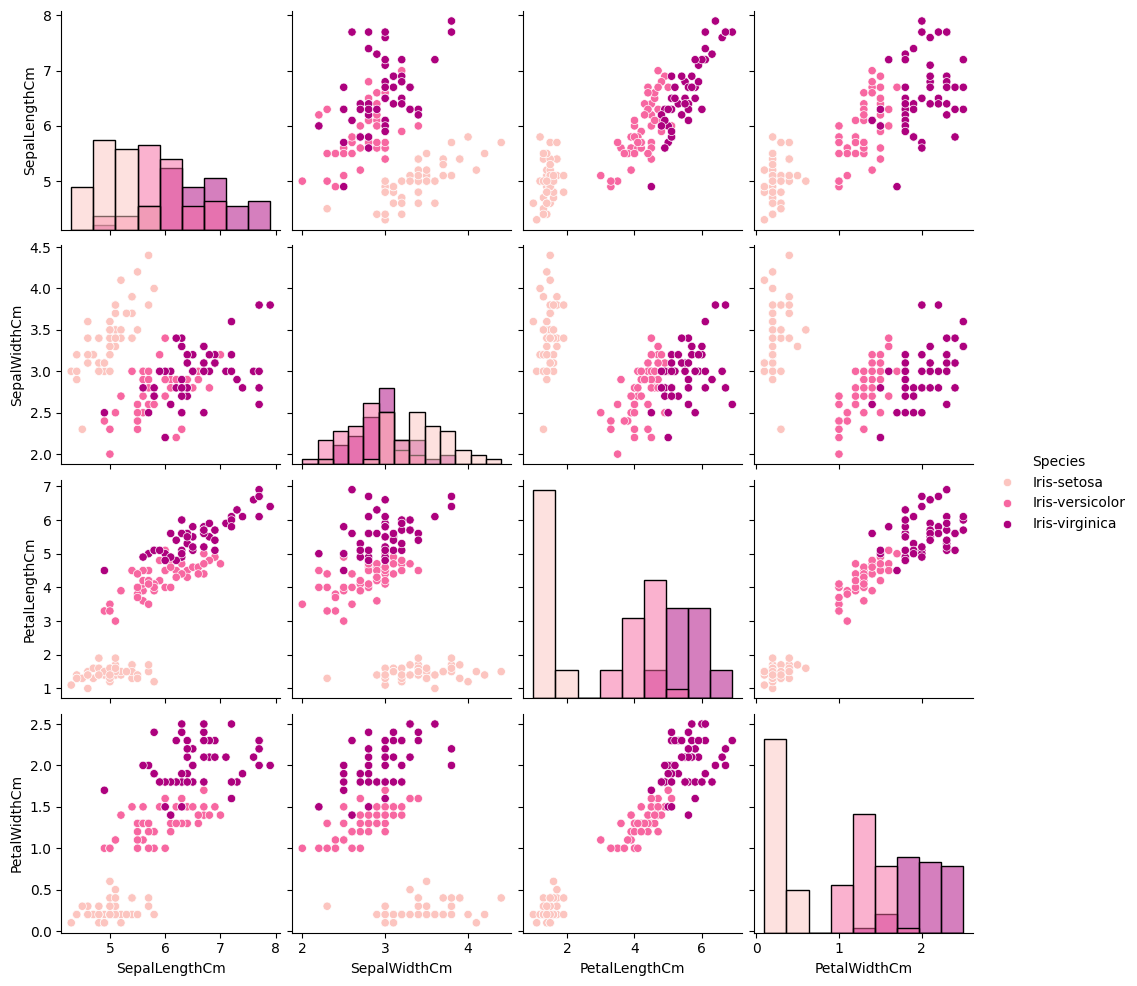

In [ ]:
variable = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
pairplot = sns.pairplot(data,hue = 'Species', diag_kind = 'hist', palette = 'RdPu',  vars = variable)

<Axes: >

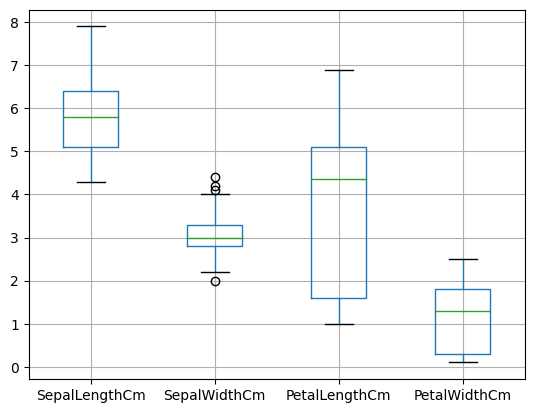

In [ ]:
data.boxplot(column = variable)

In [ ]:
for K in range(1,11):
  X = data[variable].values
  y = data['Species'].values
  knn = KNeighborsClassifier(n_neighbors=K)
  score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  print('Cross-Validated accuracy : ', score.mean()*100,'%')

Cross-Validated accuracy :  96.0 %
Cross-Validated accuracy :  95.33333333333334 %
Cross-Validated accuracy :  96.66666666666666 %
Cross-Validated accuracy :  96.66666666666666 %
Cross-Validated accuracy :  96.66666666666669 %
Cross-Validated accuracy :  96.66666666666669 %
Cross-Validated accuracy :  96.66666666666669 %
Cross-Validated accuracy :  96.66666666666669 %
Cross-Validated accuracy :  97.33333333333334 %
Cross-Validated accuracy :  96.66666666666669 %


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668]


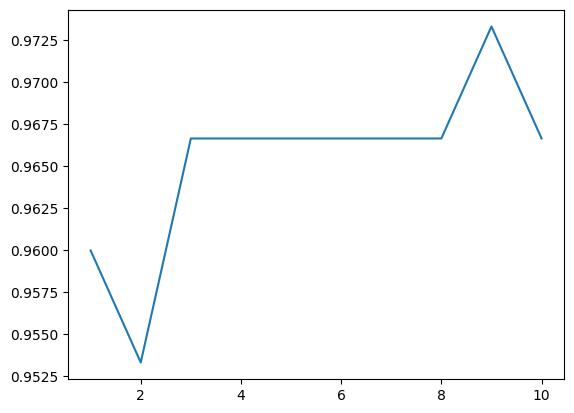

In [ ]:
range_k = range(1,11)
k_score = []

for k in range_k:
 knn = KNeighborsClassifier(n_neighbors=k)
 score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
 k_score.append(score.mean())
print(k_score)

plt.plot(range_k, k_score)
plt.show()

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9666666666666666, 0.9533333333333334, 0.9666666666666668, 0.9533333333333334, 0.96]


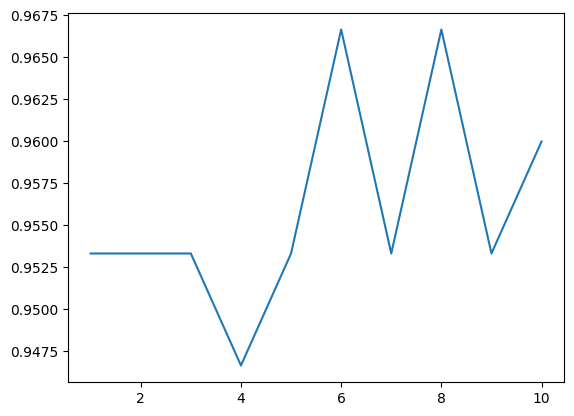

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

range_k = range(1,11)
k_score = []

for k in range_k:
 knn = KNeighborsClassifier(n_neighbors=k)
 score = cross_val_score(knn, X_normalized, y, cv=10, scoring='accuracy')
 k_score.append(score.mean())
print(k_score)

plt.plot(range_k, k_score)
plt.show()

Cross-Validated accuracy :  97.33333333333334 % ,Best K-value :  {'n_neighbors': 9}
[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667]


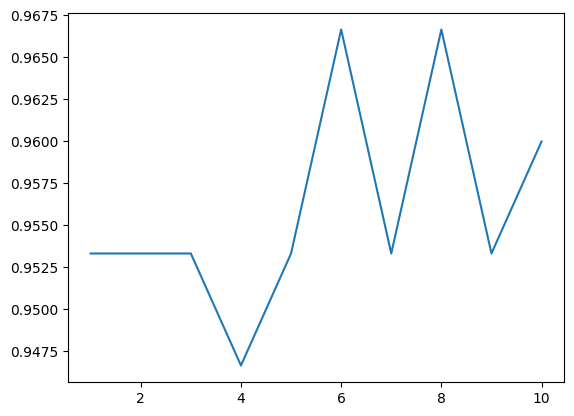

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
range_k = range(1,11)
knn_params = {'n_neighbors': range_k}
grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
grid_model.fit(X, y)
mean_scores = grid_model.cv_results_['mean_test_score']
print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
 ',Best K-value : ', grid_model.best_params_)
print(mean_scores)
plt.plot(range_k, k_score)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def data_preparation(data):
 data = data.drop(["show_id", "title", "country", "cast", "director", "listed_in",
 "description"], axis=1)
 print(data.isnull().sum())
 data['type'] = data['type'].apply(lambda x: '1' if x == 'TV Show' else '0')
 data['type'] = data['type'].astype(int)
 data['date_added'] = pd.to_datetime(data['date_added'])
 data['date_added'] = data.date_added.dt.year
 data["date_added"] = data["date_added"].fillna(2019)
 data['date_added'] = data['date_added'].astype(int)
 data['duration'] = data.duration.str.extract("([0-9]+)", expand=False)
 data["duration"] = pd.to_numeric(data["duration"])
 data.dropna(inplace=True, subset=['rating'])
 return data

In [ ]:
data = pd.read_csv('Netflix_Dataset.csv')
print(data.info())
new_data = data_preparation(data)
X = new_data.drop("rating", axis=1).values
y = new_data.rating
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier()
range_k = range(1,33)
knn_params = {'n_neighbors': range_k ,'weights': ['uniform', 'distance']}
print(knn_params)
grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
grid_model.fit(X_train, y_train)
print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
 ',Best K-value : ', grid_model.best_params_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None
type             0
date_added      10
release_year     0
rating           7
duration         0
dtype: int64
{'n_neighbors': range(1, 33), 'weights': ['uniform', 'distance']}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validated accuracy :  42.335731575769145 % ,Best K-value :  {'n_neighbors': 23, 'weights': 'uniform'}


In [ ]:
y_pred = grid_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4524421593830334


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
def data_preparation(data):
 data = data.drop(["show_id", "title", "cast", "director",
 "description"], axis=1)
 print(data.isnull().sum())
 data['type'] = data['type'].apply(lambda x: '1' if x == 'TV Show' else '0')
 data['type'] = data['type'].astype(int)
 data['date_added'] = pd.to_datetime(data['date_added'])
 data['date_added'] = data.date_added.dt.year
 data["date_added"] = data["date_added"].fillna(2019)
 data['date_added'] = data['date_added'].astype(int)
 data['duration'] = data.duration.str.extract("([0-9]+)", expand=False)
 data["duration"] = pd.to_numeric(data["duration"])
 data.dropna(inplace=True, subset=['rating'])

 data['country'] = label_encoder.fit_transform(data['country'])
 data['listed_in'] = label_encoder.fit_transform(data['listed_in'])
 return data

data = pd.read_csv('Netflix_Dataset.csv')
print(data.info())
new_data = data_preparation(data)
X = new_data.drop("rating", axis=1).values
y = new_data.rating
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier()
range_k = range(1,51)
knn_params = {'n_neighbors': range_k ,'weights': ['uniform', 'distance']}
print(knn_params)
grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
grid_model.fit(X_train, y_train)
print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
 ',Best K-value : ', grid_model.best_params_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None
type              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
dtype: int64
{'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validated accuracy :  51.767224249430974 % ,Best K-value :  {'n_neighbors': 28, 'weights': 'distance'}
